Project Objective:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Dataset Reference:

https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

Dataset Attributes: 

Pregnancies(NPG):   Number of times pregnant

Glucose(GPL):       Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure(DIA): Diastolic blood pressure (mm Hg)

SkinThickness(TSF): Triceps skin fold thickness (mm)

Insulin(INS):       2-Hour serum insulin (mu U/ml)

BMI:                Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction(DPF): Diabetes pedigree function

Age: Age (years)

In [59]:
import pandas as pd
import itertools
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree, metrics
from sklearn.cross_validation import cross_val_score , cross_val_predict,train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
#Function to measure algorithm accuracy 
def accuracy_score(y_actual,y_pred):
    return metrics.accuracy_score(y_actual,y_pred)*100

In [61]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [62]:
#Import data
X=pd.read_csv("pima_X.csv")
X.head()

,Unnamed: 0,NPG,PGL,DIA,TSF,INS,BMI,DPF,AGE
0,1,6,148,72,35,0,33.6,0.627,50
1,2,1,85,66,29,0,26.6,0.351,31
2,3,8,183,64,0,0,23.3,0.672,32
3,4,1,89,66,23,94,28.1,0.167,21
4,5,0,137,40,35,168,43.1,2.288,33


In [63]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Unnamed: 0    768 non-null int64
NPG           768 non-null int64
PGL           768 non-null int64
DIA           768 non-null int64
TSF           768 non-null int64
INS           768 non-null int64
BMI           768 non-null float64
DPF           768 non-null float64
AGE           768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [64]:
#Drop the columns not required for analysis
X.drop(['Unnamed: 0'],axis=1)

,NPG,PGL,DIA,TSF,INS,BMI,DPF,AGE
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [65]:
#import label data
y=pd.read_csv("pima_Y.csv")
y.head()

,Diabet
0,1
1,0
2,1
3,0
4,1


In [66]:
#Splitting the data into train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=4)

# Random Forest

In [67]:
#Inititae Random Forest Classifier 
clf= RandomForestClassifier()

### Cross-Validation 

In [68]:
#Cross Validation into 10 folds 
clf_scores=cross_val_score(clf,X,np.ravel(y),cv=10)
print(clf_scores)

[ 0.71428571  0.75324675  0.67532468  0.66233766  0.66233766  0.79220779
  0.75324675  0.84415584  0.75        0.75      ]


In [69]:
#mean score and the 95% confidence interval of the score estimate
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)" % (clf_scores.mean(), clf_scores.std() * 2))

Random Forest Classifier Accuracy: 0.74 (+/- 0.11)


In [70]:
# Prediction - Cross Validation
predicted= cross_val_predict(clf,X,np.ravel(y),cv=10)
print(predicted)

[0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1
 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1
 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1
 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1
 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 1 0 0 0 

In [71]:
#Algorithm accuarcy 
a_score_clf = accuracy_score(y,predicted)
print("Metric function accuracy for cross_val_predict data:%f" %a_score_clf)

Metric function accuracy for cross_val_predict data:74.739583


### Train-Test Split

In [72]:
#Fit the model on training data
clf.fit(X_train,np.ravel(y_train))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [73]:
#Predict on test data
y_clf_pred = clf.predict(X_test)
y_clf_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [74]:
#compare actual response value (y_test) with the predicted response value (y_clf_pred)
a_score_clf = accuracy_score(y_test,y_clf_pred)
print("Metric function accuracy for training data :%f" %a_score_clf)

Metric function accuracy for training data :76.041667


In [75]:
cnf_matrix = metrics.confusion_matrix(y_test,y_clf_pred)

In [76]:
class_names = ['Diabetic','Non-Diabetic']

Confusion matrix, without normalization
[[111  15]
 [ 31  35]]


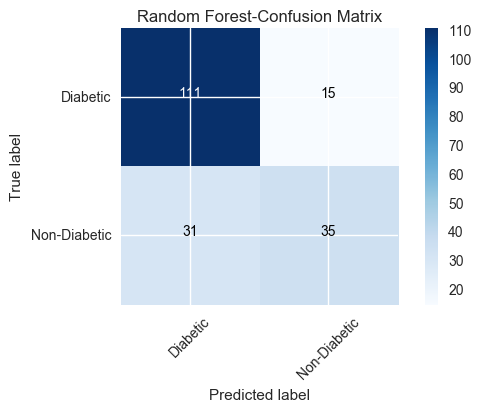

In [77]:
#Plot Confusion Matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Random Forest-Confusion Matrix')
plt.show()

In [78]:
print(metrics.classification_report(y_test,y_clf_pred,target_names = class_names))

              precision    recall  f1-score   support

    Diabetic       0.78      0.88      0.83       126
Non-Diabetic       0.70      0.53      0.60        66

 avg / total       0.75      0.76      0.75       192



# K-NN

In [79]:
#Initiate KnnClassifier
knn= KNeighborsClassifier(n_neighbors=7)

In [80]:
#Cross Validation Score
knn_scores=cross_val_score(knn,X,np.ravel(y),cv=10)
print(knn_scores)

[ 0.55844156  0.66233766  0.67532468  0.50649351  0.48051948  0.54545455
  0.62337662  0.68831169  0.68421053  0.63157895]


In [81]:
#mean score and the 95% confidence interval of the score estimate
print("KNN Classifier Accuracy: %0.2f (+/- %0.2f)" % (knn_scores.mean(), knn_scores.std() * 2))

KNN Classifier Accuracy: 0.61 (+/- 0.15)


In [82]:
 #Cross Validation predict
Predict_knn = cross_val_predict(knn,X,np.ravel(y),cv=10)
print(Predict_knn)

[1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1
 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0
 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1
 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1
 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0
 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 

In [83]:
a_score_knn = accuracy_score(y,Predict_knn)
print("SVM - Metric function accuracy for cross_val_predict data:%f" %a_score_knn)

SVM - Metric function accuracy for cross_val_predict data:60.546875


# Train-Test Split

In [84]:
#Fit the training data
knn.fit(X_train,np.ravel(y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [85]:
#predict labels for test data
y_knn_predict=knn.predict(X_test)
print(y_knn_predict)

[1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1
 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0
 0 0 0 0 0 0 0]


In [86]:
#Accuracy on testing data
knn_test = accuracy_score(y_test,y_knn_predict)
print(knn_test)

72.3958333333


In [87]:
knn_matrix_knn = metrics.confusion_matrix(y_test,y_knn_predict)

Confusion matrix, without normalization
[[104  22]
 [ 31  35]]


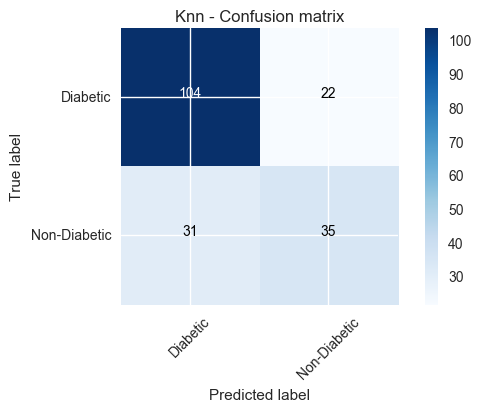

In [88]:
#Plot Confusion Matrix
plt.figure()
plot_confusion_matrix(knn_matrix_knn, classes=class_names,
                      title='Knn - Confusion matrix')
plt.show()

In [89]:
print(metrics.classification_report(y_test,y_knn_predict,target_names = class_names))

              precision    recall  f1-score   support

    Diabetic       0.77      0.83      0.80       126
Non-Diabetic       0.61      0.53      0.57        66

 avg / total       0.72      0.72      0.72       192



In [90]:
#Initiate Decision tree classifier
Tree = tree.DecisionTreeClassifier()


In [91]:
#Cross Validation Score
Tree_scores=cross_val_score(Tree,X,np.ravel(y),cv=10)
print(Tree_scores)

[ 0.61038961  0.75324675  0.68831169  0.5974026   0.66233766  0.75324675
  0.84415584  0.80519481  0.64473684  0.73684211]


In [92]:
#mean score and the 95% confidence interval of the score estimate
print("KNN Classifier Accuracy: %0.2f (+/- %0.2f)" % (Tree_scores.mean(), Tree_scores.std() * 2))

KNN Classifier Accuracy: 0.71 (+/- 0.16)


In [93]:
#Prediction-Cross Validation 
Predict_Tree = cross_val_predict(Tree,X,np.ravel(y),cv=10)
print(Predict_Tree)

[1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1
 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0
 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1
 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0
 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1
 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0
 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1
 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1
 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1
 0 0 0 1 1 1 1 0 1 0 0 0 

In [94]:
#Accuracy of Algorithm 
a_score_Tree = accuracy_score(y,Predict_Tree)
print("SVM - Metric function accuracy for cross_val_predict data:%f" %a_score_Tree)

SVM - Metric function accuracy for cross_val_predict data:69.531250


# Train-Test Split

In [95]:
Tree.fit(X_train,np.ravel(y_train))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [96]:
#predict labels for test data
y_Tree_predict=Tree.predict(X_test)
print(y_Tree_predict)

[1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1
 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1
 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1
 0 1 1 0 0 0 0]


In [97]:
#Accuracy on testing data
Tree_test = accuracy_score(y_test,y_Tree_predict)
print(Tree_test)

72.9166666667


In [98]:
Tree_matrix = metrics.confusion_matrix(y_test,y_Tree_predict)

Confusion matrix, without normalization
[[99 27]
 [25 41]]


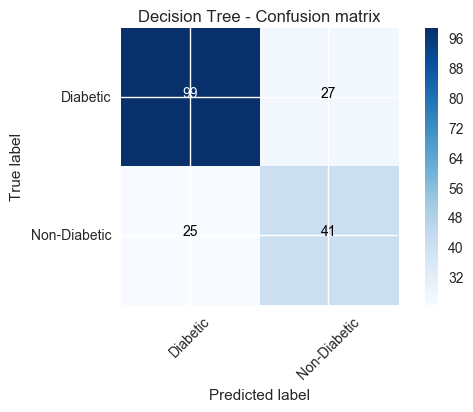

In [99]:
#Plot Confusion Matrix 
plt.figure()
plot_confusion_matrix(Tree_matrix, classes=class_names,
                      title='Decision Tree - Confusion matrix')
plt.show()

Results:
Random Forest Accuracy : 76.04%
KNN Accuracy           : 72.39%
Decision Tree Accuracy : 72.91%
    
Created a predictive model to determine whether a individual has diabetes or no based on given parameters.
Based on given data the random forest algorithm can be used for pediction given a information about particular patient.
    